# Diabetes in 130 US hospitals for the years 1999 to 2008

## Data preparation

**Abstract**: This data has been prepared to analyze factors related to readmission as well as other outcomes pertaining to patients with diabetes.

**Data Set Information**: The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

 1. It is an inpatient encounter (a hospital admission).
 2. It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
 3. The length of stay was at least 1 day and at most 14 days.
 4. Laboratory tests were performed during the encounter.
 5. Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

More information can be found at the [Diabetes 130-US hospitals for years 1999-2008 data set - UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008) web site.

 - [Loading data](#Loading-data)
 - [Exploratory data analysis](#Exploratory-data-analysis)
   - [Removing NaNs and bias values](#Removing-NaNs-and-bias-values)
   - [Grouping primary diagnosis values into group names](#Grouping-primary-diagnosis-values-into-group-names)
   - [Converting categorical variables into dummy variables](#Converting-categorical-variables-into-dummy-variables)
 - [Saving results](#Saving-results)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

# Loading data

In [187]:
df = pd.read_csv('data/diabetic_data.csv', na_values='?', low_memory=False)
obj_cols = list(df.select_dtypes('object').columns)
df[obj_cols] = df[obj_cols].astype('category')

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null category
gender                      101766 non-null category
age                         101766 non-null category
weight                      3197 non-null category
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null category
medical_specialty           51817 non-null category
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient          

In [6]:
df.nunique().sort_values(ascending=False)

encounter_id                101766
patient_nbr                 71518 
diag_3                      789   
diag_2                      748   
diag_1                      716   
num_lab_procedures          118   
num_medications             75    
medical_specialty           72    
number_outpatient           39    
number_emergency            33    
discharge_disposition_id    26    
number_inpatient            21    
admission_source_id         17    
payer_code                  17    
number_diagnoses            16    
time_in_hospital            14    
age                         10    
weight                      9     
admission_type_id           8     
num_procedures              7     
race                        5     
repaglinide                 4     
max_glu_serum               4     
A1Cresult                   4     
metformin                   4     
rosiglitazone               4     
pioglitazone                4     
insulin                     4     
nateglinide         

In [7]:
df.describe().applymap('{:.1f}'.format)

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,101766.0
mean,165201645.6,54330400.7,2.0,3.7,5.8,4.4,43.1,1.3,16.0,0.4,0.2,0.6,7.4
std,102640296.0,38696359.3,1.4,5.3,4.1,3.0,19.7,1.7,8.1,1.3,0.9,1.3,1.9
min,12522.0,135.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
25%,84961194.0,23413221.0,1.0,1.0,1.0,2.0,31.0,0.0,10.0,0.0,0.0,0.0,6.0
50%,152388987.0,45505143.0,1.0,1.0,7.0,4.0,44.0,1.0,15.0,0.0,0.0,0.0,8.0
75%,230270887.5,87545949.8,3.0,4.0,7.0,6.0,57.0,2.0,20.0,0.0,0.0,1.0,9.0
max,443867222.0,189502619.0,8.0,28.0,25.0,14.0,132.0,6.0,81.0,42.0,76.0,21.0,16.0


# Exploratory data analysis

In [8]:
missing_values = df.isnull().sum()/df.shape[0]*100
missing_values.sort_values(ascending=True, inplace=True)
missing_df = missing_values.reset_index().rename(columns={'index': 'Features', 0: 'Values'})
missing_df['Values'] = missing_df['Values'].apply('{:.1f}'.format).astype('float')

In [9]:
missing_df.loc[missing_df['Values'] != 0].sort_values(by='Values', ascending=False)

,Features,Values
49,weight,96.9
48,medical_specialty,49.1
47,payer_code,39.6
46,race,2.2
45,diag_3,1.4
44,diag_2,0.4


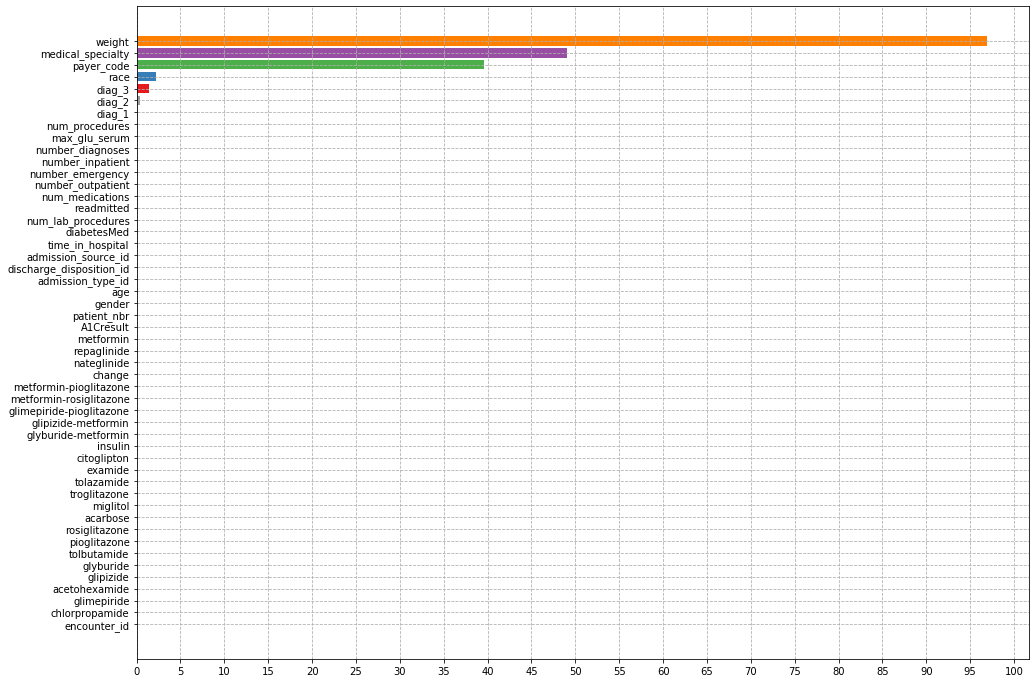

In [10]:
fig, axes = plt.subplots(figsize=(16, 12))
axes.barh(missing_df['Features'], missing_df['Values'], color=plt.cm.Set1.colors)
plt.xticks(np.linspace(0, 100, 21))
plt.grid(True, linestyle='--');

In [11]:
df['race'].unique()

[Caucasian, AfricanAmerican, NaN, Other, Asian, Hispanic]
Categories (5, object): [Caucasian, AfricanAmerican, Other, Asian, Hispanic]

From the bar plot below, we can without issue drop the `NaN` values from race.

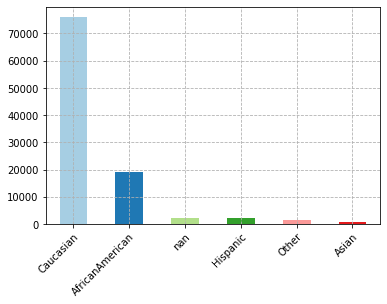

In [12]:
race_sorted_df = df['race'].value_counts(dropna=False)
ax = race_sorted_df.plot(kind='bar', color=plt.cm.Paired.colors)
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor", rotation=45)
plt.grid(True, linestyle='--');

We can remove the `Unknown/Invalid` category from the `Gender` category.

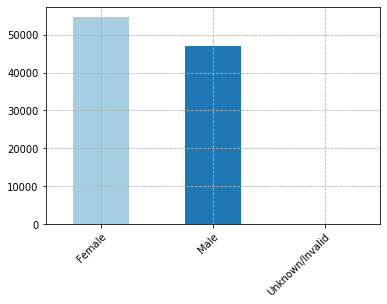

In [13]:
gender_sorted_df = df['gender'].value_counts(dropna=False)
ax = gender_sorted_df.plot(kind='bar', color=plt.cm.Paired.colors)
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor", rotation=45)
plt.grid(True, linestyle='--');

Due to the predominance of `NaN` values in the `Payer Code` category, we will drop the entire column from the data set.

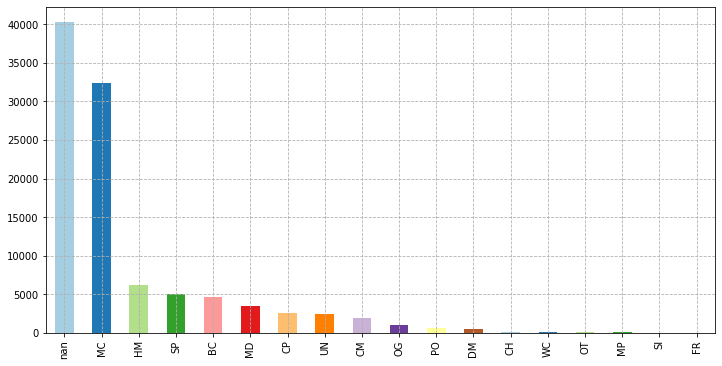

In [14]:
payer_code_sorted_df = df['payer_code'].value_counts(dropna=False)
payer_code_sorted_df.plot(kind='bar', color=plt.cm.Paired.colors, figsize=(12, 6))
plt.grid(True, linestyle='--');

As above, we will drop the `Medical Specialty` columns due to the predominance of `NaN` values.

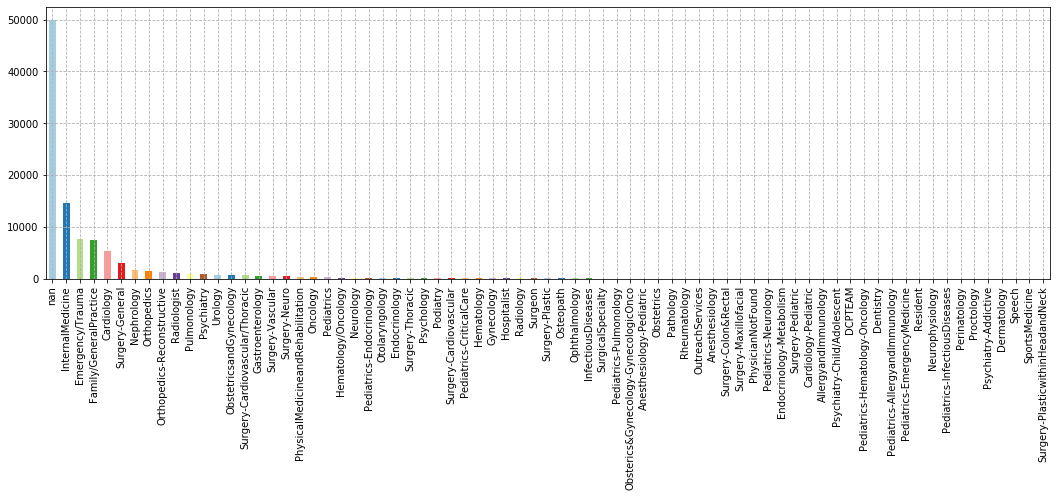

In [15]:
medical_specialty_df = df['medical_specialty'].value_counts(dropna=False)
medical_specialty_df.plot(kind='bar', color=plt.cm.Paired.colors, figsize=(18, 5))
plt.grid(True, linestyle='--');

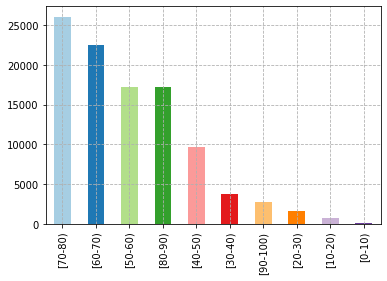

In [16]:
age_df = df['age'].value_counts(dropna=False)
age_df.plot(kind='bar', color=plt.cm.Paired.colors)
plt.grid(True, linestyle='--');

We want to predict the `readmitted` feature in our data analysis.

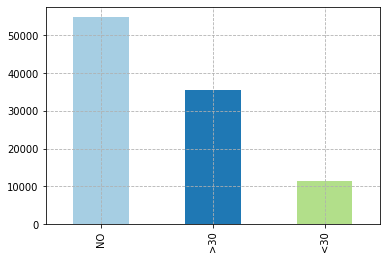

In [17]:
readmitted_df = df['readmitted'].value_counts(dropna=False)
readmitted_df.plot(kind='bar', color=plt.cm.Paired.colors)
plt.grid(True, linestyle='--');

In [18]:
numeric_cols = list(df.select_dtypes('int64').columns)
print(len(numeric_cols))

13


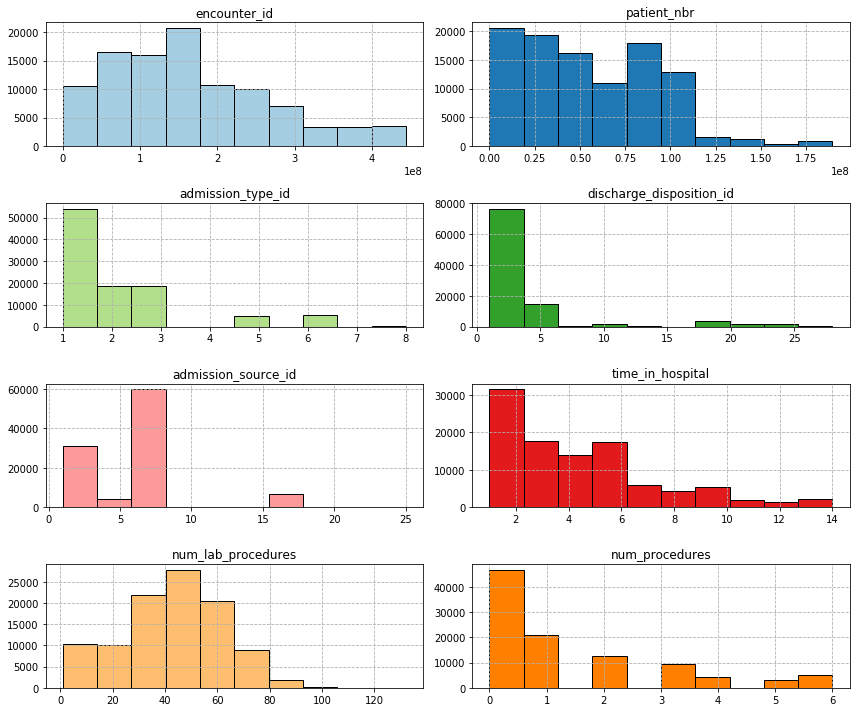

In [19]:
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
colors = plt.cm.Paired.colors
for c, ax, col in zip(colors, axes.flat, numeric_cols):
    ax.hist(df[col], color=c, edgecolor='k', bins=10)
    ax.set_title(col)
    ax.grid(True, linestyle='--')
fig.tight_layout()

## Removing NaNs and bias values

In [188]:
df.shape

(101766, 50)

We're removing null values for race and `Unknown/Invalid` values for gender.

In [189]:
df = df.loc[df.race.notnull()]
df = df.loc[df.gender != 'Unknown/Invalid', :]

As stated above, we remove `weight`, `medical_specialty` and `payer_code` due to the large presence of `NaN` values. We also remove `encounter_id` since it isn't relevant to our analysis.

In [190]:
df.drop(['weight', 'medical_specialty', 'payer_code', 'encounter_id'], axis=1, inplace=True)

We are also doing away with not available, null, not mapped and unknown/invaild admission type and admission source IDs.

In [191]:
df = df.loc[~df['admission_type_id'].isin([5, 6])]
df = df.loc[~df['admission_source_id'].isin([9, 17, 20, 21])]

In [192]:
df.shape

(88462, 46)

Now we will discard all rows that contains `NaN` values.

In [193]:
df.dropna(how='any', inplace=True)
df.isnull().any()

patient_nbr                 False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide                   False
tolbutamide                 False
pioglitazone  

In [194]:
df.shape

(87199, 46)

According to the [analysis conditions laid out in the research article](https://www.hindawi.com/journals/bmri/2014/781670/), the duplicate patient data were removed to mantain the statistical independence of the data, which is a condition required by logistic regression.

In [195]:
df.drop_duplicates(['patient_nbr'], inplace=True)

Moreover, all patient data related to discharge to a hospice or patient death were removed to avoid biases. Null patient values were remove as well.

In [196]:
discharged_to_hospice_or_expired_or_null = [11, 13, 14, 18, 19, 20, 21, 25, 26]
df = df.loc[~df['discharge_disposition_id'].isin(discharged_to_hospice_or_expired_or_null)]

In [197]:
df.shape

(57247, 46)

## Grouping primary diagnosis values into group names

Column values for `diag_1`, `diag_2` and `diag_3` are encoded in over 700 individual code entries of which the first three digits are listed in each entry. Following the grouping in Table 2 of the article, we can reduce these values to nine major groups, which are `Circulatory`, `Respiratory`, `Digestive`, `Diabetes`, `Injury`, `Musculoskeletal`, `Genitourinary`, `Neoplasms` and `Others`.

In [198]:
circulatory_list = [str(f) for f in list(range(390, 460)) + [785]]
respiratory_list = [str(f) for f in list(range(460, 520)) + [786]]
digestive_list = [str(f) for f in list(range(520, 580)) + [787]]
injury_list = [str(f) for f in list(range(800, 1000))]
musculoskeletal_list = [str(f) for f in list(range(710, 740))]
genitourinary_list = [str(f) for f in list(range(580, 630)) + [788]]
neoplasms_list = [str(f) for f in list(range(140, 240))]
others_list = [str(f) for f in [780, 781, 782, 784] + list(range(790, 800)) + list(range(240, 250)) + \
               list(range(680, 710)) + list(range(251, 280))] + [str(f).zfill(3) for f in list(range(1, 140))] + \
              [str(f) for f in list(range(290, 320))] + \
              [str(f) for f in list(range(280, 290)) + list(range(320, 390)) + list(range(630, 680)) + \
               list(range(740, 760))]

In [199]:
diagnosis_list = [circulatory_list, respiratory_list, digestive_list, injury_list, musculoskeletal_list, \
genitourinary_list, neoplasms_list, others_list]
diagnoses = ['circulatory', 'respiratory', 'digestive', 'injury', 'musculoskeletal', 'genitourinary', 'neoplasms', \
            'others']

In [200]:
for list_, col in zip(diagnosis_list, diagnoses):
    filter_ = df['diag_1'].isin(list_)
    df.loc[filter_, col+'_col'] = pd.Categorical([col for i in range(filter_.sum())])

In [201]:
df.shape

(57247, 54)

In [202]:
char_list = ['250.', 'E', 'V']
diag_char_list = ['diabetes', 'others', 'others']

In [203]:
for char, col in zip(char_list, diag_char_list):
    filter_ = df['diag_1'].str.contains(char)
    df.loc[filter_, col+'_col'] = pd.Categorical([col for i in range(filter_.sum())])

In [204]:
df.shape

(57247, 55)

In [205]:
df.drop(['diag_1', 'diag_2', 'diag_3'], axis=1, inplace=True)

In [206]:
df.shape

(57247, 52)

In [207]:
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,circulatory_col,respiratory_col,digestive_col,injury_col,musculoskeletal_col,genitourinary_col,neoplasms_col,others_col,diabetes_col
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,NaN
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,NaN
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,NaN,NaN,NaN,NaN,NaN,NaN,neoplasms,NaN,NaN
5,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,circulatory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
diagnoses_list = [col+'_col' for col in diagnoses + ['diabetes']]
# df[diagnoses_list].dropna(how='all')

,circulatory_col,respiratory_col,digestive_col,injury_col,musculoskeletal_col,genitourinary_col,neoplasms_col,others_col,diabetes_col
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,neoplasms,NaN,NaN
5,circulatory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,circulatory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,circulatory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,circulatory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,circulatory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,diabetes


In [209]:
df.shape

(57247, 52)

In [210]:
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,circulatory_col,respiratory_col,digestive_col,injury_col,musculoskeletal_col,genitourinary_col,neoplasms_col,others_col,diabetes_col
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,NaN
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,NaN
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,NaN,NaN,NaN,NaN,NaN,NaN,neoplasms,NaN,NaN
5,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,circulatory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
diagnoses_list = [col+'_col' for col in diagnoses + ['diabetes']]
df[diagnoses_list].stack()

1       others_col             others         
2       others_col             others         
4       neoplasms_col          neoplasms      
5       circulatory_col        circulatory    
6       circulatory_col        circulatory    
7       circulatory_col        circulatory    
8       circulatory_col        circulatory    
9       circulatory_col        circulatory    
10      diabetes_col           diabetes       
11      neoplasms_col          neoplasms      
12      circulatory_col        circulatory    
13      circulatory_col        circulatory    
14      respiratory_col        respiratory    
15      injury_col             injury         
16      circulatory_col        circulatory    
17      others_col             others         
18      circulatory_col        circulatory    
22      circulatory_col        circulatory    
23      others_col             others         
24      neoplasms_col          neoplasms      
25      respiratory_col        respiratory    
26      circu

## Converting categorical variables into dummy variables

I followed the `DictVectorizer` procedure in the [Encoding Categorical Features blog plot on Medium](https://towardsdatascience.com/encoding-categorical-features-21a2651a065c).

In [111]:
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57247 entries, 1 to 101765
Data columns (total 85 columns):
patient_nbr                        57247 non-null int64
admission_type_id                  57247 non-null int64
discharge_disposition_id           57247 non-null int64
admission_source_id                57247 non-null int64
time_in_hospital                   57247 non-null int64
num_lab_procedures                 57247 non-null int64
num_procedures                     57247 non-null int64
num_medications                    57247 non-null int64
number_outpatient                  57247 non-null int64
number_emergency                   57247 non-null int64
number_inpatient                   57247 non-null int64
number_diagnoses                   57247 non-null int64
race_Asian                         57247 non-null uint8
race_Caucasian                     57247 non-null uint8
race_Hispanic                      57247 non-null uint8
race_Other                         57247 non-null 

In [112]:
df.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_No,metformin_Steady,metformin_Up,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,readmitted_>30,readmitted_NO
1,55629189,1,1,7,3,59,0,18,0,0,0,9,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0
2,86047875,1,1,7,2,11,5,13,2,0,1,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1
3,82442376,1,1,7,2,44,1,16,0,0,0,7,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1
4,42519267,1,1,7,1,51,0,8,0,0,0,5,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1
5,82637451,2,1,2,3,31,6,16,0,0,0,9,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0


In [105]:
# from sklearn.feature_extraction import DictVectorizer
# df_to_dict = df.to_dict(orient='records')
# dv = DictVectorizer(sparse=False)
# dict_to_arr_encoded = dv.fit_transform(df_to_dict)

In [106]:
# dict_to_arr_encoded.shape

(57247, 129)

In [107]:
# vocab = list(dv.vocabulary_)
# df_encoded = pd.DataFrame(dict_to_arr_encoded, columns=vocab)

In [108]:
# df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57247 entries, 0 to 57246
Columns: 129 entries, patient_nbr to metformin-pioglitazone=Steady
dtypes: float64(129)
memory usage: 56.3 MB


In [109]:
# df_encoded.shape

(57247, 129)

In [110]:
# df_encoded.head()

,patient_nbr,race=Caucasian,gender=Female,age=[10-20),admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum=None,A1Cresult=None,metformin=No,repaglinide=No,nateglinide=No,chlorpropamide=No,glimepiride=No,acetohexamide=No,glipizide=No,glyburide=No,tolbutamide=No,pioglitazone=No,rosiglitazone=No,acarbose=No,miglitol=No,troglitazone=No,tolazamide=No,examide=No,citoglipton=No,insulin=Up,glyburide-metformin=No,glipizide-metformin=No,glimepiride-pioglitazone=No,metformin-rosiglitazone=No,metformin-pioglitazone=No,change=Ch,diabetesMed=Yes,readmitted=>30,Circulatory,Respiratory,Digestive,Injury,Musculoskeletal,Genitourinary,Neoplasms,Others=Others,Diabetes,race=AfricanAmerican,age=[20-30),glipizide=Steady,insulin=No,change=No,readmitted=NO,gender=Male,age=[30-40),Others,age=[40-50),insulin=Steady,Neoplasms=Neoplasms,age=[50-60),Circulatory=Circulatory,age=[60-70),metformin=Steady,glimepiride=Steady,age=[70-80),glyburide=Steady,age=[80-90),age=[90-100),rosiglitazone=Steady,Diabetes=Diabetes,glyburide=Up,readmitted=<30,repaglinide=Up,insulin=Down,Respiratory=Respiratory,Injury=Injury,diabetesMed=No,race=Other,A1Cresult=>7,acarbose=Steady,Genitourinary=Genitourinary,metformin=Up,troglitazone=Steady,Musculoskeletal=Musculoskeletal,Digestive=Digestive,A1Cresult=>8,A1Cresult=Norm,glipizide=Down,repaglinide=Steady,glimepiride=Up,tolazamide=Steady,glipizide=Up,glyburide=Down,race=Asian,tolbutamide=Steady,rosiglitazone=Up,chlorpropamide=Steady,pioglitazone=Steady,race=Hispanic,age=[0-10),glimepiride=Down,metformin=Down,acarbose=Up,rosiglitazone=Down,pioglitazone=Up,glyburide-metformin=Steady,pioglitazone=Down,nateglinide=Steady,chlorpropamide=Down,chlorpropamide=Up,repaglinide=Down,glyburide-metformin=Down,glyburide-metformin=Up,nateglinide=Down,miglitol=Steady,acetohexamide=Steady,miglitol=Down,nateglinide=Up,glipizide-metformin=Steady,max_glu_serum=>300,max_glu_serum=Norm,miglitol=Up,max_glu_serum=>200,metformin-pioglitazone=Steady
0,0.0,0.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,1.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,59.0,18.0,0.0,9.0,0.0,0.0,0.0,55629189.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,1.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,7.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0,13.0,5.0,6.0,0.0,1.0,2.0,86047875.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,7.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,44.0,16.0,1.0,7.0,0.0,0.0,0.0,82442376.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,1.0,NaN,0.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.

# Saving results

In [ ]:
df_encoded.to_csv('data/df_encoded.csv')
# df.to_csv('data/cleaned_diabetic_data.csv')